In [16]:
from linear_regression import LinearRegression

In [17]:
model = LinearRegression()
model

In [18]:
import pandas as pd

# Läser in datan
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
import numpy as np

# Skapar målvariabeln Y
Y = df["median_house_value"].values.reshape(-1, 1)

# Plockar ut de två features vi använder
X = df[["median_income", "housing_median_age"]].values

# Lägger till en kolumn med ettor för interceptet
X = np.hstack([np.ones((X.shape[0], 1)), X])

In [20]:
# Tränar modellen
model = LinearRegression()
model.fit(X, Y)

In [21]:
model.rmse(X, Y)

np.float64(80847.50814162685)

In [22]:
model.std(X, Y)

np.float64(80853.38432785707)

In [23]:
model.variance(X, Y)

np.float64(6537269757.268163)

In [24]:
model.b

array([[-10189.03275908],
       [ 43169.1907545 ],
       [  1744.13444566]])

Interceptet är modellens startvärde och är mest en matematisk grej. Koefficienten för medianinkomst visar hur priset förändras när inkomsten ökar, och koefficienten för husens ålder visar hur äldre hus påverkar priset. Tecknet på koefficienterna visar om sambandet är positivt eller negativt.

In [25]:
model.predict(X)[:5]

array([[420712.62638212],
       [384802.51072905],
       [393802.04339668],
       [324114.0187617 ],
       [246543.29989494]])

In [26]:
model.sse(X, Y)

np.float64(134909635980743.08)

In [27]:
model.variance(X, Y)

np.float64(6537269757.268163)

In [28]:
model.std(X, Y)

np.float64(80853.38432785707)

In [29]:
# Jämför de första fem verkliga och predikterade värdena
pd.DataFrame({
    "Y_true": Y[:5, 0],
    "Y_pred": model.predict(X)[:5, 0]
})

,Y_true,Y_pred
0,452600.0,420712.626382
1,358500.0,384802.510729
2,352100.0,393802.043397
3,341300.0,324114.018762
4,342200.0,246543.299895


Modellen använder medianinkomst och husens ålder för att förklara priset. Prediktionerna ligger hyfsat nära de verkliga värdena, men det finns tydliga skillnader. RMSE runt 80 000 är väntat eftersom priserna är höga och modellen är enkel. Resultaten visar att modellen funkar som den ska, men att två variabler inte räcker för att fånga hela variationen i datan.

In [30]:
# Exempelvärden
new_income = 5.0
new_age = 30

x_new = np.array([[1, new_income, new_age]])
model.predict(x_new)

array([[257980.95438306]])

Modellen uppskattar att ett område med de här värdena skulle ha ett genomsnittligt huspris på ungefär 258 000. Det är bara en grov uppskattning, eftersom modellen är enkel och bygger på två variabler, men den visar hur modellen använder koefficienterna för att göra en konkret prediktion.

In [31]:
# Beräknar residualerna (skillnaden mellan verkligt och predikterat värde)
residuals = Y - model.predict(X)

# Visar de första fem residualerna tillsammans med Y_true och Y_pred
pd.DataFrame({
    "Y_true": Y[:5, 0],
    "Y_pred": model.predict(X)[:5, 0],
    "residual": residuals[:5, 0]
})

,Y_true,Y_pred,residual
0,452600.0,420712.626382,31887.373618
1,358500.0,384802.510729,-26302.510729
2,352100.0,393802.043397,-41702.043397
3,341300.0,324114.018762,17185.981238
4,342200.0,246543.299895,95656.700105


Residualerna visar att modellen ofta underskattar dyra områden och överskattar billiga. Det betyder att felet inte är helt slumpmässigt och att en enkel linjär modell med två variabler inte fångar hela sambandet.

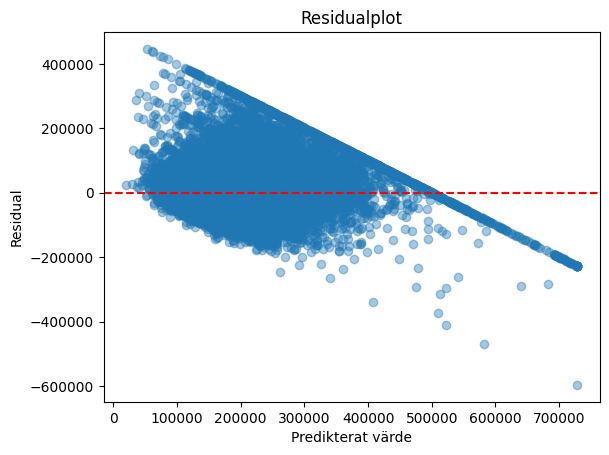

In [32]:
import matplotlib.pyplot as plt

# Residualer
residuals = Y - model.predict(X)

# Residualplot
plt.scatter(model.predict(X), residuals, alpha=0.4)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predikterat värde")
plt.ylabel("Residual")
plt.title("Residualplot")
plt.show()

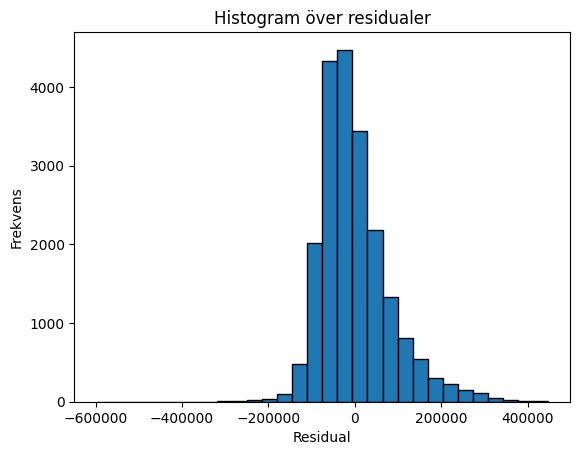

In [33]:
plt.hist(residuals, bins=30, edgecolor="black")
plt.xlabel("Residual")
plt.ylabel("Frekvens")
plt.title("Histogram över residualer")
plt.show()